In [41]:
!pip install pandas seaborn matplotlib

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('questions.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [44]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
6356,6356,12700,12701,How much % alcohol is present in rice?,Is 5-6 units of alcohol twice a week too much?,0
281959,281959,554258,554259,What action should a person do to survive in a...,How should I save myself when I am trapped in ...,1
125943,125943,249529,249530,How do I set IT career?,What is Muscle Boost X?,0
117225,117225,232352,232353,Do muslim women wear bras?,Why do women wear bras?,0
36065,36065,71862,71863,Will it be the same to read with ear plugs or ...,Will it be the same to read with ear plugs or ...,1


We got clarity that we will be given 2 ques and we need to do bin classificn on data and tell if those 2 ques are dup / not

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [46]:
df.duplicated().sum()

np.int64(0)

In [47]:
df.shape

(404351, 6)

is_duplicate
0    255045
1    149306
Name: count, dtype: int64
is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

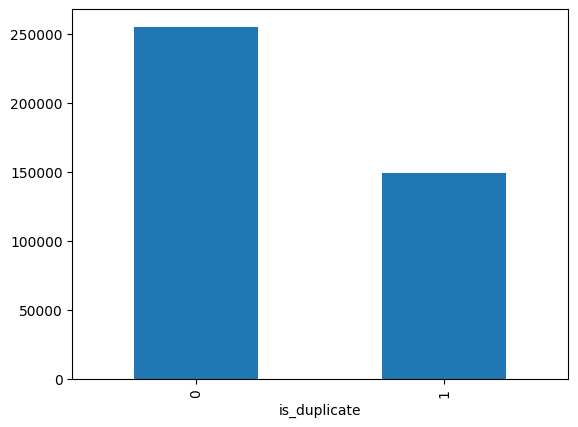

In [48]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [49]:
# Repeated ques

all_qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('No of uniq ques = ', np.unique(all_qids).shape[0])

k = all_qids.value_counts() > 1
print('No of reptd ques = ',k[k].shape[0])

No of uniq ques =  789801
No of reptd ques =  13698


In [50]:
print(all_qids.value_counts())
print('------------------')
print(all_qids.value_counts().values)

65333     50
7863      47
147324    41
2628      28
196396    26
          ..
530741     1
530743     1
530745     1
530747     1
530725     1
Name: count, Length: 789801, dtype: int64
------------------
[50 47 41 ...  1  1  1]


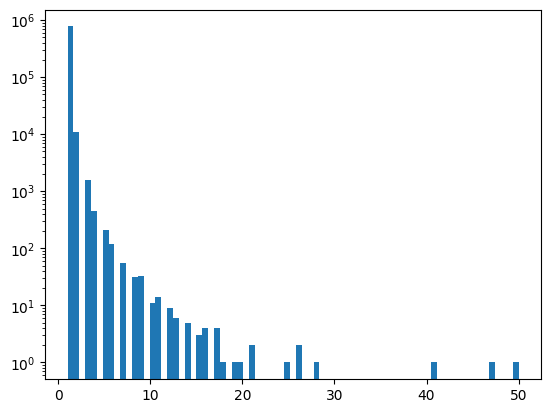

In [52]:
# Reptd ques hist

plt.hist(all_qids.value_counts().values,bins=77)
plt.yscale('log')
plt.show()